In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering 

In [90]:
df = pd.read_csv("D:\Assignment\crime_data.csv")

In [91]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [93]:
df.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [94]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [95]:
dff = df[['Murder','Assault','UrbanPop','Rape']]

In [96]:
dff

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [97]:
#df_norm = pd.DataFrame(normalize(dff), columns= dff.columns)

In [98]:
#df_norm

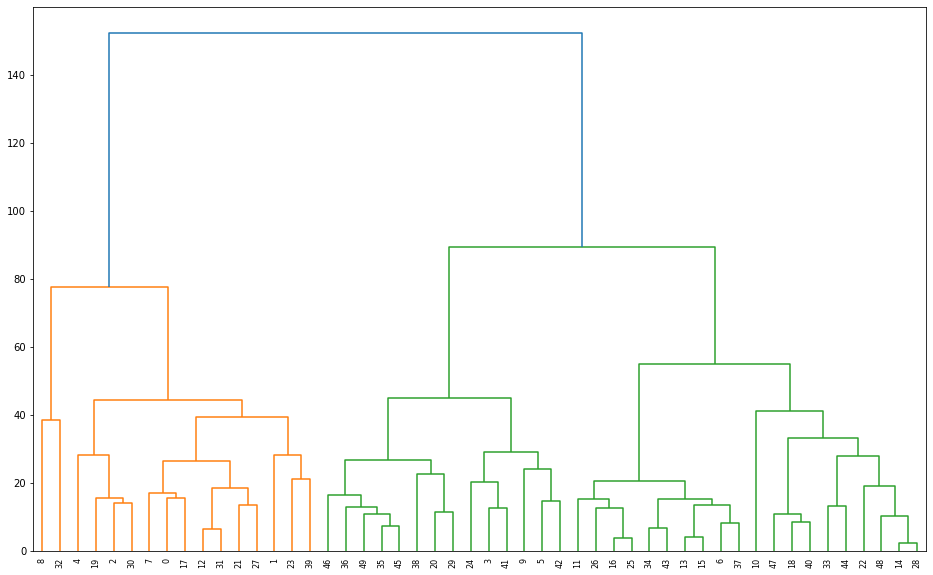

In [99]:
plt.figure(figsize=(16,10))
dend = sch.dendrogram(sch.linkage(dff, method= 'average' ))

In [100]:
hierarchy_clus = AgglomerativeClustering(n_clusters= 3,affinity= 'euclidean', linkage='average')

In [101]:
target_clu = hierarchy_clus.fit_predict(dff)
Clusters = pd.DataFrame(target_clu, columns=['Clusters'])

In [102]:
Clusters

,Clusters
0,0
1,0
2,0
3,2
4,0
5,2
6,1
7,0
8,0
9,2


In [103]:
hierarchy_model = pd.concat([dff,Clusters], axis= 1)

In [104]:
hierarchy_model

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,2


In [105]:
dff_grp = hierarchy_model.groupby('Clusters').agg(['mean']).reset_index()

In [106]:
dff_grp

,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,11.812500,272.562500,68.312500,28.375000
1,1,4.270000,87.550000,59.750000,14.390000
2,2,8.214286,173.285714,70.642857,22.842857


KMeans

In [114]:
wcss = []
for i in range(1,19):
    K_means = KMeans(n_clusters= i, random_state= 0)
    K_means.fit(dff)
    wcss.append(K_means.inertia_)

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [115]:
wcss

[355807.8216,
 96399.02814449917,
 47964.26535714286,
 34728.629357142854,
 24417.023523809523,
 18768.000666666667,
 15463.473777777777,
 13393.080476190475,
 11151.505119047619,
 9884.692976190476,
 9234.941666666666,
 8077.176499999999,
 7198.423166666666,
 6297.229833333333,
 5547.632999999999,
 5232.007333333334,
 4407.683166666667,
 4171.690666666666]

<function matplotlib.pyplot.show(close=None, block=None)>

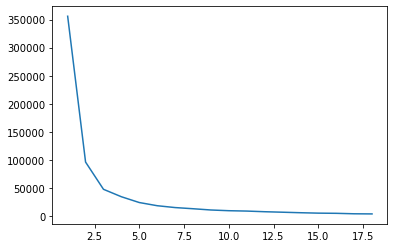

In [117]:
plt.plot(range(1,19), wcss)
plt.show

DBSCAN

In [128]:
a = dff.values

In [129]:
df_std = StandardScaler().fit(a)
X = df_std.fit_transform(a)

In [156]:
db_scan = DBSCAN(eps =1 , min_samples= 3)

In [157]:
DB_pred = db_scan.fit_predict(X)

In [158]:
DB_pred

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [159]:
db_scan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [161]:
dff['DB_val']= db_scan.labels_


In [163]:
dff_db = dff

In [164]:
dff_db

,Murder,Assault,UrbanPop,Rape,DB_val
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,0


In [170]:
dff_db.DB_val.count()

50

In [179]:
dff_grp = dff_db.groupby('DB_val').agg(['mean']).reset_index()

In [182]:
dff_db['DB_val'].value_counts()

 1    28
-1    10
 0     6
 2     3
 3     3
Name: DB_val, dtype: int64